In [8]:
#Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from numpy import asarray


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 

In [9]:
%store -r
stored_variables = dir()
dataframe_names = [var for var in stored_variables if isinstance(eval(var), pd.DataFrame)]
print(dataframe_names)

['ARIMA_static', 'ARIMA_walk_forward', 'DecisionTree_roll', 'DecisionTree_static', 'DecisionTree_wf', 'Prophet_static', 'Prophet_wf', 'RandomForest_roll', 'RandomForest_static', 'RandomForest_wf', 'XGB_roll', 'XGB_static', 'XGB_wf']


In [10]:
ARIMA_static

,mae,me,rmse,direction_accuracy
0,6.001718,0.529747,7.041768,0.6


In [11]:
ARIMA_walk_forward

,mae,me,rmse,direction_accuracy
0,8.096693,-0.622437,9.434213,0.4


In [12]:
DecisionTree_static

,mae,me,rmse,direction_accuracy
0,6.853749,-1.460209,8.211187,0.2


In [13]:
DecisionTree_roll

,mae,me,rmse,direction_accuracy
0,8.279632,2.79844,10.177761,0.4


In [14]:
DecisionTree_wf

,mae,me,rmse,direction_accuracy
0,7.835223,1.155846,9.811467,0.6


In [15]:
RandomForest_static

,mae,me,rmse,direction_accuracy
0,5.986011,0.718388,7.433007,0.6


In [16]:
RandomForest_roll

,mae,me,rmse,direction_accuracy
0,6.58827,1.331207,8.613069,0.6


In [17]:
RandomForest_wf

,mae,me,rmse,direction_accuracy
0,7.165923,1.722831,8.955055,0.6


In [18]:
XGB_static

,mae,me,rmse,direction_accuracy
0,5.661845,-0.011496,6.924746,0.8


In [19]:
XGB_roll

,mae,me,rmse,direction_accuracy
0,6.500999,1.180559,8.362858,0.6


In [20]:
XGB_wf

,mae,me,rmse,direction_accuracy
0,6.264596,1.654419,7.940568,0.6


In [21]:
Prophet_static

,mae,me,rmse,direction_accuracy
0,9.261666,-8.743701,11.414295,0.4


In [22]:
Prophet_wf

,mae,me,rmse,direction_accuracy
0,6.73186,-5.106923,8.70973,0.4


In [23]:
# Add a new column to each dataframe to store the dataframe name
ARIMA_static['Model'] = 'ARIMA_static'
ARIMA_walk_forward['Model'] = 'ARIMA_walk_forward'
DecisionTree_static['Model'] = 'DecisionTree_static'
DecisionTree_roll['Model'] = 'DecisionTree_roll'
DecisionTree_wf['Model'] = 'DecisionTree_wf'
RandomForest_static['Model'] = 'RandomForest_static'
RandomForest_roll['Model'] = 'RandomForest_roll'
RandomForest_wf['Model'] = 'RandomForest_wf'
XGB_static['Model'] = 'XGB_static'
XGB_roll['Model'] = 'XGB_roll'
XGB_wf['Model'] = 'XGB_wf'
Prophet_static['Model'] = 'Prophet_static'
Prophet_wf['Model'] = 'Prophet_wf'

# Concatenate the dataframes vertically
combined_df = pd.concat([ARIMA_static, ARIMA_walk_forward, DecisionTree_static, DecisionTree_roll, DecisionTree_wf, 
                         RandomForest_static, RandomForest_roll, RandomForest_wf, XGB_static, XGB_roll, XGB_wf, 
                         Prophet_static, Prophet_wf], ignore_index=True)

# Display the combined dataframe
print(combined_df)

         mae        me       rmse  direction_accuracy                Model
0   6.001718  0.529747   7.041768                 0.6         ARIMA_static
1   8.096693 -0.622437   9.434213                 0.4   ARIMA_walk_forward
2   6.853749 -1.460209   8.211187                 0.2  DecisionTree_static
3   8.279632  2.798440  10.177761                 0.4    DecisionTree_roll
4   7.835223  1.155846   9.811467                 0.6      DecisionTree_wf
5   5.986011  0.718388   7.433007                 0.6  RandomForest_static
6   6.588270  1.331207   8.613069                 0.6    RandomForest_roll
7   7.165923  1.722831   8.955055                 0.6      RandomForest_wf
8   5.661845 -0.011496   6.924746                 0.8           XGB_static
9   6.500999  1.180559   8.362858                 0.6             XGB_roll
10  6.264596  1.654419   7.940568                 0.6               XGB_wf
11  9.261666 -8.743701  11.414295                 0.4       Prophet_static
12  6.731860 -5.106923   

In [27]:
combined_df.sort_values(by='rmse')

,mae,me,rmse,direction_accuracy,Model
8,5.661845,-0.011496,6.924746,0.8,XGB_static
0,6.001718,0.529747,7.041768,0.6,ARIMA_static
5,5.986011,0.718388,7.433007,0.6,RandomForest_static
10,6.264596,1.654419,7.940568,0.6,XGB_wf
2,6.853749,-1.460209,8.211187,0.2,DecisionTree_static
9,6.500999,1.180559,8.362858,0.6,XGB_roll
6,6.588270,1.331207,8.613069,0.6,RandomForest_roll
12,6.731860,-5.106923,8.709730,0.4,Prophet_wf
7,7.165923,1.722831,8.955055,0.6,RandomForest_wf
1,8.096693,-0.622437,9.434213,0.4,ARIMA_walk_forward


In [28]:
combined_df.sort_values(by='direction_accuracy',ascending=False)

,mae,me,rmse,direction_accuracy,Model
8,5.661845,-0.011496,6.924746,0.8,XGB_static
0,6.001718,0.529747,7.041768,0.6,ARIMA_static
4,7.835223,1.155846,9.811467,0.6,DecisionTree_wf
5,5.986011,0.718388,7.433007,0.6,RandomForest_static
6,6.588270,1.331207,8.613069,0.6,RandomForest_roll
7,7.165923,1.722831,8.955055,0.6,RandomForest_wf
9,6.500999,1.180559,8.362858,0.6,XGB_roll
10,6.264596,1.654419,7.940568,0.6,XGB_wf
1,8.096693,-0.622437,9.434213,0.4,ARIMA_walk_forward
3,8.279632,2.798440,10.177761,0.4,DecisionTree_roll


In [24]:
combined_df

,mae,me,rmse,direction_accuracy,Model
0,6.001718,0.529747,7.041768,0.6,ARIMA_static
1,8.096693,-0.622437,9.434213,0.4,ARIMA_walk_forward
2,6.853749,-1.460209,8.211187,0.2,DecisionTree_static
3,8.279632,2.798440,10.177761,0.4,DecisionTree_roll
4,7.835223,1.155846,9.811467,0.6,DecisionTree_wf
5,5.986011,0.718388,7.433007,0.6,RandomForest_static
6,6.588270,1.331207,8.613069,0.6,RandomForest_roll
7,7.165923,1.722831,8.955055,0.6,RandomForest_wf
8,5.661845,-0.011496,6.924746,0.8,XGB_static
9,6.500999,1.180559,8.362858,0.6,XGB_roll


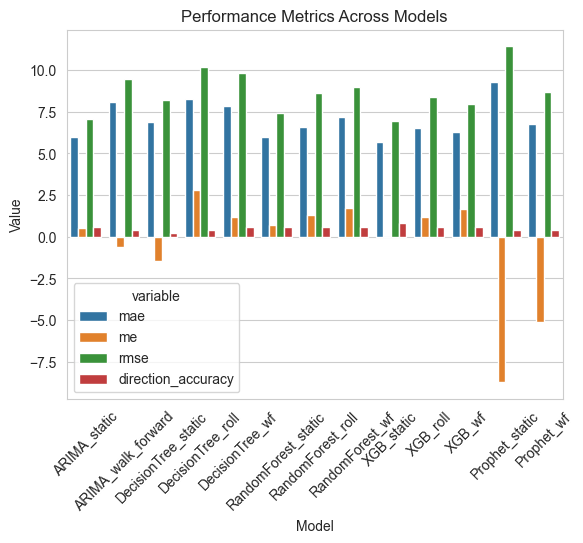

In [26]:
# If you want to show all metrics in one plot, remove the loop and use this instead:
sns.barplot(data=combined_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('Performance Metrics Across Models')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

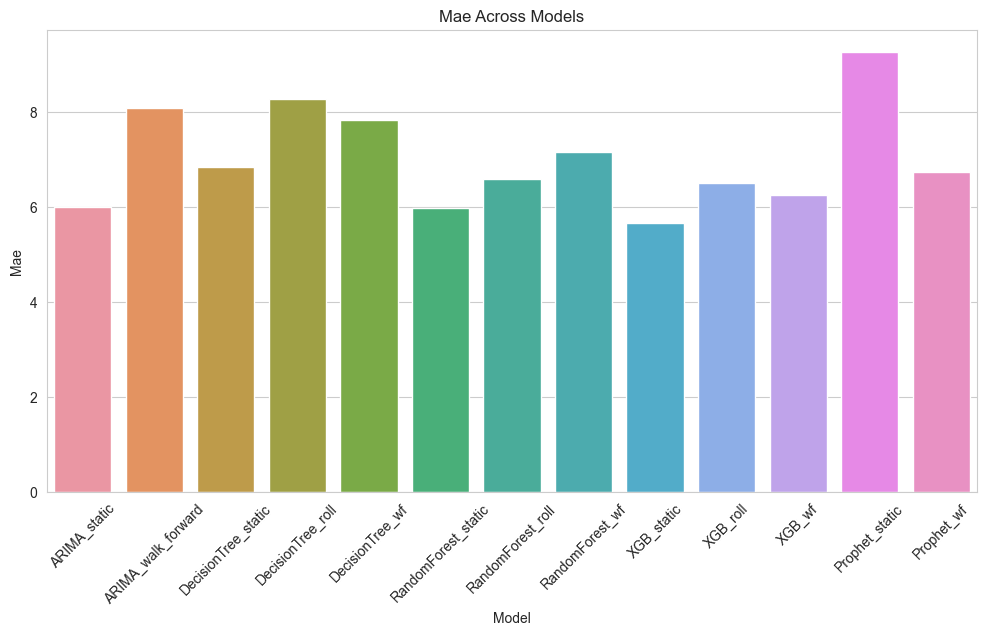

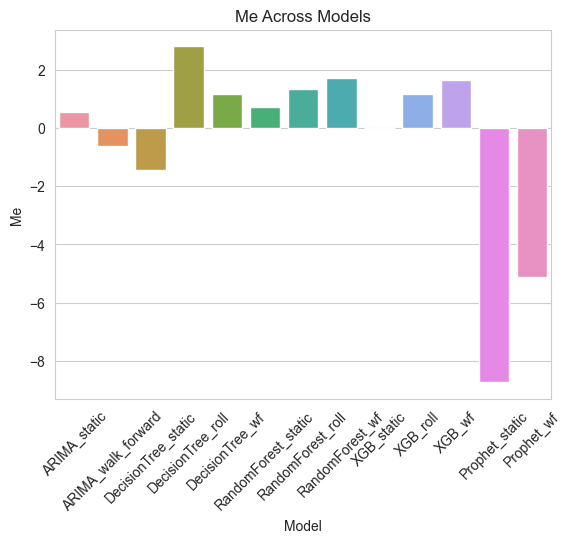

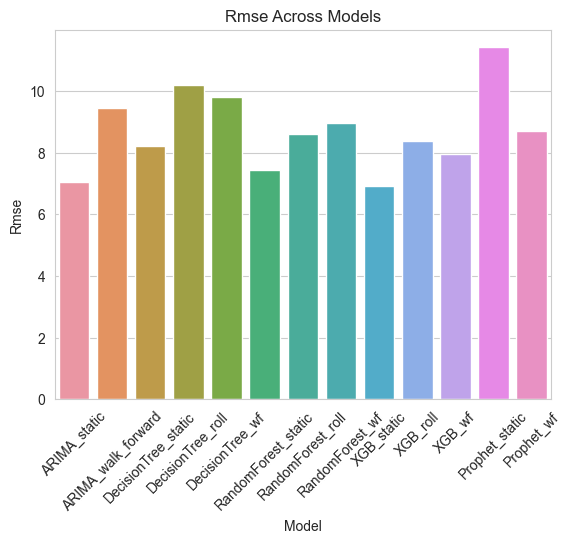

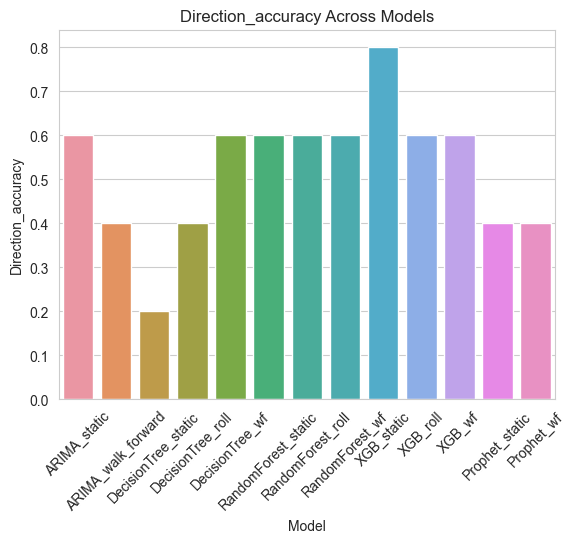

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame containing the model names and performance metrics
# Replace 'Model' with the actual column name in your DataFrame
# Replace 'mae', 'me', 'rmse', 'direction_accuracy' with the actual column names for the performance metrics

# Set the style
sns.set_style("whitegrid")

# Plot
plt.figure(figsize=(12, 6))

# Loop through each metric
for metric in ['mae', 'me', 'rmse', 'direction_accuracy']:
    # Plot the metric for each model
    sns.barplot(data=combined_df, x='Model', y=metric)
    plt.title(f'{metric.capitalize()} Across Models')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()  # Show each plot separately


